In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_dato = {'CON_DATO':'#8dd3c7', 'ELIMINADO':'#ffffb3', 'SIN_DATO':'#fb8072'}
color_sexo = {'HOMBRE':'#80b1d3', 'MUJER':'#bebada', 'DESCONO':'#fccde5'}


In [2]:
df = pd.read_csv('data_raw/RNPDNO_V1.csv')
df = df[df['SUBCAMPO'].str.len()>1]

dic_campo = {'DATOS DE LA PERSONA DESAPARECIDA O\xa0NO\xa0LOCALIZADA':'DESAPARECIDA', 'DATOS DE LA PERSONA QUE REPORTA':'REPORTA', 'DATOS DE LA(S) PERSONA(S) PROBABLEMENTE INVOLUCRADA(S)':'INVOLUCRADAS', 'DATOS DE LA AUTORIDAD':'AUTORIDAD', }
df['CAMPO'] = df['CAMPO'].replace(dic_campo)

df_sexo = df[['IDX_REPORTE','SEXO']].dropna(axis=0)
df = df.drop('SEXO', axis=1).merge(df_sexo, on='IDX_REPORTE', how='left')
df['SEXO'] = df['SEXO'].fillna('DESCONO')
df

,IDX_REPORTE,CAMPO,SUBCAMPO,N_SUBCAMPO,INSTITUCION,TOTAL,CON_DATO,ELIMINADO,SIN_DATO,ESTADO,SEXO
0,01-000001-0,DESAPARECIDA,DATOS DEL REPORTE,0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,9,7,0,2,ESTADO DE MEXICO,HOMBRE
1,01-000001-0,DESAPARECIDA,DATOS GENERALES,0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,22,18,0,4,ESTADO DE MEXICO,HOMBRE
2,01-000001-0,DESAPARECIDA,DOMICILIO,0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,14,1,7,6,ESTADO DE MEXICO,HOMBRE
3,01-000001-0,DESAPARECIDA,ALIAS O APODOS,0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,2,1,0,1,ESTADO DE MEXICO,HOMBRE
4,01-000001-0,DESAPARECIDA,PSEUDONIMO,0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,4,1,0,3,ESTADO DE MEXICO,HOMBRE
...,...,...,...,...,...,...,...,...,...,...,...
4675265,21-001743-0,INVOLUCRADAS,PERTENENCIA GRUPAL,0,PROCURADURIA GENERAL DE JUSTICIA DE LA CIUDAD ...,5,1,0,4,CIUDAD DE MEXICO,DESCONO
4675266,21-001743-0,INVOLUCRADAS,PRENDAS DE VESTIR Y PERTENENCIAS,0,PROCURADURIA GENERAL DE JUSTICIA DE LA CIUDAD ...,9,1,0,8,CIUDAD DE MEXICO,DESCONO
4675267,21-001743-0,INVOLUCRADAS,MEDIA FILIACION,0,PROCURADURIA GENERAL DE JUSTICIA DE LA CIUDAD ...,31,1,0,30,CIUDAD DE MEXICO,DESCONO
4675268,21-001743-0,INVOLUCRADAS,SEÑAS PARTICULARES,0,PROCURADURIA GENERAL DE JUSTICIA DE LA CIUDAD ...,9,1,0,8,CIUDAD DE MEXICO,DESCONO


# Falta de información por subcampo

In [3]:
df_campo = df.drop('N_SUBCAMPO', axis=1).groupby('CAMPO').sum()
df_campo = df_campo.divide(df_campo['TOTAL'], axis=0).drop('TOTAL', axis=1)
df_campo

,CON_DATO,ELIMINADO,SIN_DATO
CAMPO,,,
AUTORIDAD,0.100000,0.476403,0.423597
DESAPARECIDA,0.146077,0.038814,0.815109
INVOLUCRADAS,0.070423,0.000000,0.929577
REPORTA,0.092461,0.244291,0.663248


<AxesSubplot:xlabel='CAMPO'>

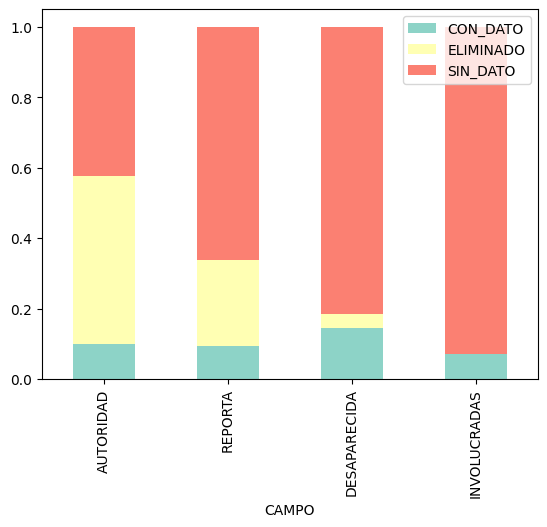

In [4]:
df_campo.sort_values('SIN_DATO').plot.bar(stacked=True, color=color_dato)
plt.savefig('RN_campo_info.svg')

In [5]:
df_sub = df.drop('N_SUBCAMPO', axis=1).groupby(['CAMPO','SUBCAMPO']).sum()
df_sub = df_sub.divide(df_sub['TOTAL'], axis=0).drop('TOTAL', axis=1)
df_sub.sort_values('CON_DATO', ascending=False).reset_index()

,CAMPO,SUBCAMPO,CON_DATO,ELIMINADO,SIN_DATO
0,DESAPARECIDA,DATOS DEL REPORTE,0.553954,0.039545,0.406501
1,DESAPARECIDA,ALIAS O APODOS,0.498848,0.034757,0.466395
2,DESAPARECIDA,FOTOGRAFIAS,0.423817,0.017212,0.558971
3,DESAPARECIDA,HECHOS,0.421512,0.278078,0.300410
4,DESAPARECIDA,DATOS GENERALES,0.400774,0.144864,0.454362
5,DESAPARECIDA,SEÑAS PARTICULARES,0.337254,0.047404,0.615342
6,DESAPARECIDA,MEDIOS DE CONTACTO,0.295708,0.023482,0.680810
7,DESAPARECIDA,PSEUDONIMO,0.254134,0.001008,0.744858
8,DESAPARECIDA,PRENDAS DE VESTIR Y PERTENENCIAS,0.251781,0.027643,0.720576
9,REPORTA,MEDIOS DE CONTACTO,0.219608,0.337697,0.442694


<AxesSubplot:xlabel='SUBCAMPO'>

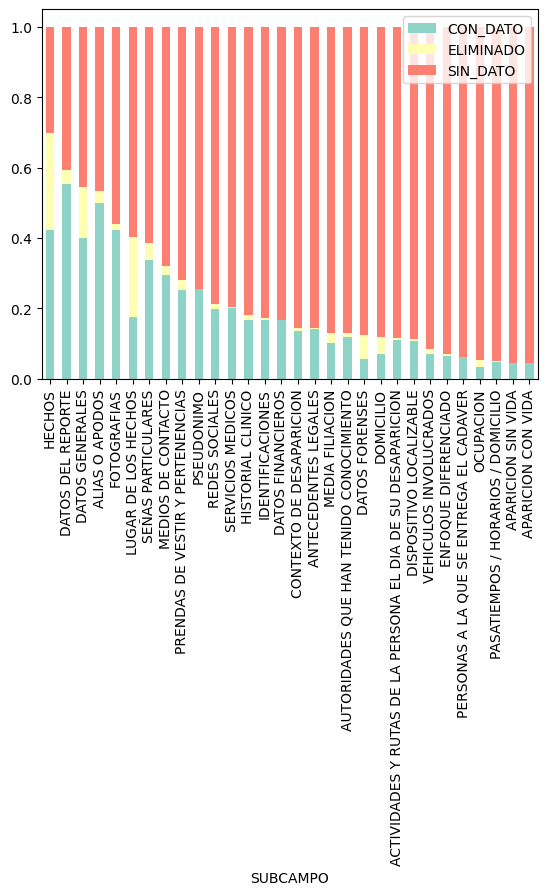

In [6]:
df_sub.loc['DESAPARECIDA'].sort_values('SIN_DATO').plot.bar(stacked=True, color=color_dato)
plt.savefig('RN_subcampo_info.svg')

# Genero y estado

In [7]:
df_general = df[(df['CAMPO']=='DESAPARECIDA') & (df['SUBCAMPO']=='DATOS GENERALES')] \
                .drop([ 'CAMPO', 'SUBCAMPO', 'N_SUBCAMPO',], axis=1)
df_general.head()

,IDX_REPORTE,INSTITUCION,TOTAL,CON_DATO,ELIMINADO,SIN_DATO,ESTADO,SEXO
1,01-000001-0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,22,18,0,4,ESTADO DE MEXICO,HOMBRE
40,01-000002-0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,22,17,1,4,MICHOACAN,HOMBRE
79,01-000003-0,FISCALIA GENERAL DE DURANGO,22,9,1,12,DURANGO,MUJER
118,01-000004-0,COMISION LOCAL DE BUSQUEDA DE PERSONAS DEL EST...,22,3,5,14,ESTADO DE MEXICO,DESCONO
157,01-000005-0,FISCALIA GENERAL DE QUINTANA ROO,22,3,11,8,QUINTANA ROO,DESCONO


In [8]:
df_general['SEXO'].value_counts(normalize=True)

HOMBRE     0.538155
DESCONO    0.288179
MUJER      0.173666
Name: SEXO, dtype: float64

SEXO,DESCONO,HOMBRE,MUJER
ESTADO,,,
AGUASCALIENTES,39,178,98
BAJA CALIFORNIA,478,1108,530
BAJA CALIFORNIA SUR,281,733,151
CAMPECHE,53,17,15
CHIAPAS,182,541,238
CHIHUAHUA,28,2790,404
CIUDAD DE MEXICO,2270,1438,838
COAHUILA,477,2184,602
COLIMA,112,853,337


<AxesSubplot:ylabel='ESTADO'>

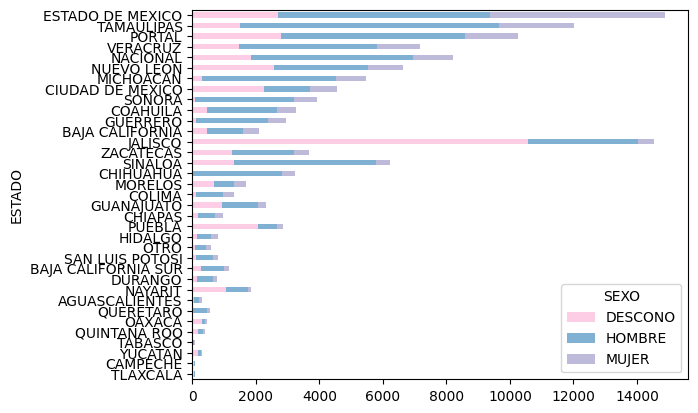

In [9]:
df_count_inst = pd.pivot_table(df_general, index='ESTADO', columns='SEXO', values='TOTAL', aggfunc='count').fillna(0)
#df_count_inst = df_count_inst.divide(df_count_inst.sum(axis=1), axis=0) 
display(df_count_inst)
df_count_inst.sort_values('MUJER').plot.barh(stacked=True, color=color_sexo)

plt.savefig('RN_edo_sexo.svg')

SEXO,DESCONO,HOMBRE,MUJER
ESTADO,,,
AGUASCALIENTES,0.123810,0.565079,0.311111
BAJA CALIFORNIA,0.225898,0.523629,0.250473
BAJA CALIFORNIA SUR,0.241202,0.629185,0.129614
CAMPECHE,0.623529,0.200000,0.176471
CHIAPAS,0.189386,0.562955,0.247659
CHIHUAHUA,0.008690,0.865922,0.125388
CIUDAD DE MEXICO,0.499340,0.316322,0.184338
COAHUILA,0.146184,0.669323,0.184493
COLIMA,0.086022,0.655146,0.258833


<AxesSubplot:ylabel='ESTADO'>

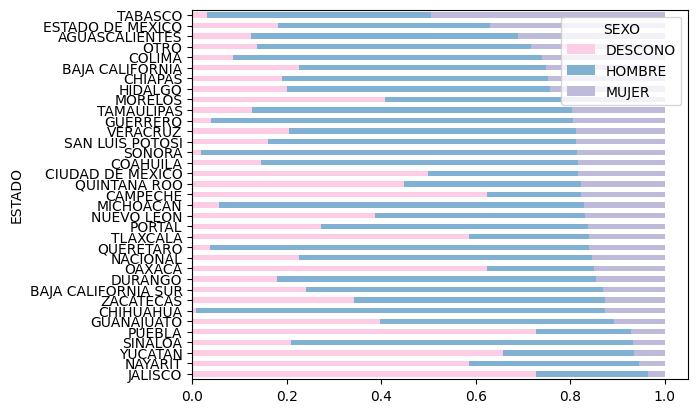

In [10]:
df_count_inst = pd.pivot_table(df_general, index='ESTADO', columns='SEXO', values='TOTAL', aggfunc='count').fillna(0)
df_count_inst = df_count_inst.divide(df_count_inst.sum(axis=1), axis=0) 
display(df_count_inst)
df_count_inst.sort_values('MUJER').plot.barh(stacked=True, color=color_sexo)
plt.savefig('RN_subcampo_info_norm.svg')

# Falta de información por género

,CON_DATO,ELIMINADO,SIN_DATO
SEXO,,,
DESCONO,105031,368917,327952
HOMBRE,761381,26896,709219
MUJER,248801,7293,227158


<AxesSubplot:title={'center':'DESCONO'}, xlabel='SEXO'>

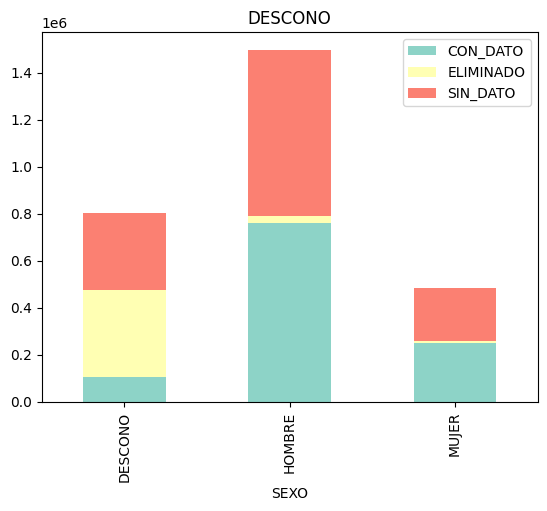

In [11]:
df_info = df_general.groupby('SEXO').sum().drop('TOTAL', axis=1)
#df_info = df_info.divide( df_info.sum(axis=1), axis=0 )
display( df_info )
df_info.plot.bar(stacked=True, color=color_dato, title='DESCONO')
plt.savefig('sexo_info_norm.svg')

In [12]:
df_info_por_sexo = df_general.groupby(['SEXO','ESTADO']).sum().drop('TOTAL', axis=1)
df_info_por_sexo = df_info_por_sexo.divide(df_info_por_sexo.sum(axis=1), axis=0).fillna(0)
df_info_por_sexo

CON_DATO  ELIMINADO  SIN_DATO
SEXO    ESTADO                                            
DESCONO AGUASCALIENTES       0.136364   0.608392  0.255245
        BAJA CALIFORNIA      0.136459   0.457208  0.406333
        BAJA CALIFORNIA SUR  0.139275   0.544646  0.316079
        CAMPECHE             0.136364   0.466552  0.397084
        CHIAPAS              0.136364   0.441808  0.421828
...                               ...        ...       ...
MUJER   TAMAULIPAS           0.351190   0.011306  0.637504
        TLAXCALA             0.438312   0.032468  0.529221
        VERACRUZ             0.453735   0.005876  0.540389
        YUCATAN              0.411483   0.007177  0.581340
        ZACATECAS            0.560606   0.005051  0.434343

[105 rows x 3 columns]

<AxesSubplot:title={'center':'DESCONO'}, ylabel='ESTADO'>

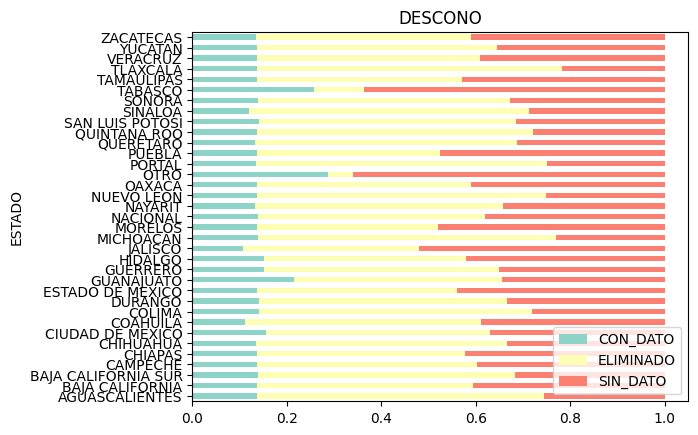

In [13]:
df_info_por_sexo.loc['DESCONO'] \
                .plot.barh(stacked=True, color=color_dato, title='DESCONO')
plt.savefig('sexo_edo_info_descono.svg')

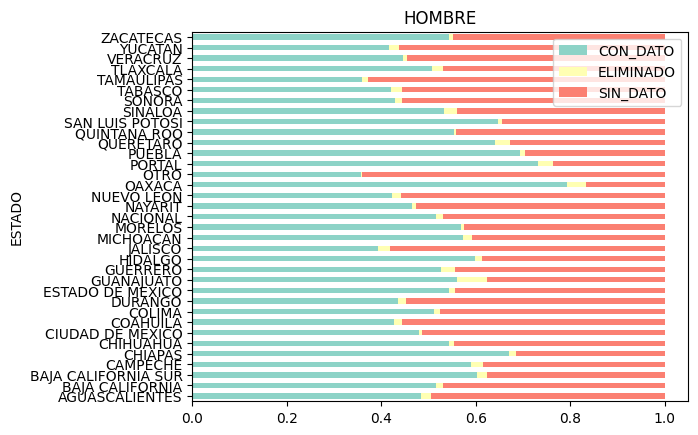

In [14]:
df_info_por_sexo.loc['HOMBRE'] \
                .plot.barh(stacked=True, color=color_dato, title='HOMBRE')
plt.savefig('sexo_edo_info_hombre.svg')

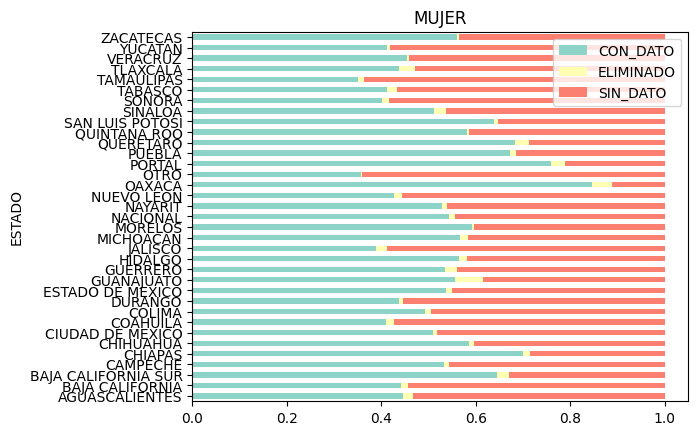

In [15]:
df_info_por_sexo.loc['MUJER'] \
                .plot.barh(stacked=True, color=color_dato, title='MUJER')
plt.savefig('sexo_edo_info_mujer.svg')

In [20]:
from itertools import product

for sexo, info in product(['HOMBRE', 'MUJER', 'DESCONO'],['CON_DATO', 'ELIMINADO', 'SIN_DATO']):
    data = df_info_por_sexo.loc[sexo,info].sort_values(ascending=False)
    print(f"\n\nEstados con más registros de {sexo} {info}")
    display(round(data.head()*100,2))
    print(f"\nEstados con menos registros de {sexo} {info}")
    display(data.tail()*100)




Estados con más registros de HOMBRE CON_DATO


ESTADO
OAXACA             79.27
PORTAL             73.14
PUEBLA             69.35
CHIAPAS            67.13
SAN LUIS POTOSI    64.81
Name: CON_DATO, dtype: float64


Estados con menos registros de HOMBRE CON_DATO


ESTADO
TABASCO       41.972921
YUCATAN       41.740576
JALISCO       39.287690
TAMAULIPAS    35.849036
OTRO          35.766234
Name: CON_DATO, dtype: float64



Estados con más registros de HOMBRE ELIMINADO


ESTADO
GUANAJUATO    6.28
OAXACA        3.99
QUERETARO     3.15
PORTAL        3.12
GUERRERO      2.88
Name: ELIMINADO, dtype: float64


Estados con menos registros de HOMBRE ELIMINADO


ESTADO
ZACATECAS           0.746687
MORELOS             0.598846
CIUDAD DE MEXICO    0.518397
QUINTANA ROO        0.399263
OTRO                0.194805
Name: ELIMINADO, dtype: float64



Estados con más registros de HOMBRE SIN_DATO


ESTADO
OTRO          64.04
TAMAULIPAS    62.85
JALISCO       58.07
YUCATAN       56.15
NUEVO LEON    55.86
Name: SIN_DATO, dtype: float64


Estados con menos registros de HOMBRE SIN_DATO


ESTADO
QUERETARO    32.778926
CHIAPAS      31.448496
PUEBLA       29.466813
PORTAL       23.740940
OAXACA       16.737468
Name: SIN_DATO, dtype: float64



Estados con más registros de MUJER CON_DATO


ESTADO
OAXACA       84.64
PORTAL       75.89
CHIAPAS      70.07
QUERETARO    68.29
PUEBLA       67.20
Name: CON_DATO, dtype: float64


Estados con menos registros de MUJER CON_DATO


ESTADO
COAHUILA      40.924192
SONORA        40.225096
JALISCO       38.937036
OTRO          35.752259
TAMAULIPAS    35.119048
Name: CON_DATO, dtype: float64



Estados con más registros de MUJER ELIMINADO


ESTADO
GUANAJUATO    5.89
OAXACA        4.23
TLAXCALA      3.25
QUERETARO     2.94
PORTAL        2.94
Name: ELIMINADO, dtype: float64


Estados con menos registros de MUJER ELIMINADO


ESTADO
VERACRUZ        0.587600
QUINTANA ROO    0.519481
MORELOS         0.514580
ZACATECAS       0.505051
OTRO            0.106326
Name: ELIMINADO, dtype: float64



Estados con más registros de MUJER SIN_DATO


ESTADO
OTRO          64.14
TAMAULIPAS    63.75
JALISCO       58.68
SONORA        58.39
YUCATAN       58.13
Name: SIN_DATO, dtype: float64


Estados con menos registros de MUJER SIN_DATO


ESTADO
PUEBLA       31.549485
QUERETARO    28.770661
CHIAPAS      28.495034
PORTAL       21.169067
OAXACA       11.139565
Name: SIN_DATO, dtype: float64



Estados con más registros de DESCONO CON_DATO


ESTADO
OTRO                28.77
TABASCO             25.76
GUANAJUATO          21.60
CIUDAD DE MEXICO    15.63
GUERRERO            15.14
Name: CON_DATO, dtype: float64


Estados con menos registros de DESCONO CON_DATO


ESTADO
NAYARIT      13.290284
QUERETARO    13.203463
SINALOA      12.104933
COAHUILA     11.072994
JALISCO      10.812275
Name: CON_DATO, dtype: float64



Estados con más registros de DESCONO ELIMINADO


ESTADO
TLAXCALA          64.62
MICHOACAN         63.19
PORTAL            61.65
NUEVO LEON        61.20
AGUASCALIENTES    60.84
Name: ELIMINADO, dtype: float64


Estados con menos registros de DESCONO ELIMINADO


ESTADO
PUEBLA     38.772880
MORELOS    38.346509
JALISCO    37.223889
TABASCO    10.606061
OTRO        5.155211
Name: ELIMINADO, dtype: float64



Estados con más registros de DESCONO SIN_DATO


ESTADO
OTRO       66.08
TABASCO    63.64
JALISCO    51.96
MORELOS    48.00
PUEBLA     47.60
Name: SIN_DATO, dtype: float64


Estados con menos registros de DESCONO SIN_DATO


ESTADO
AGUASCALIENTES    25.524476
NUEVO LEON        25.165049
PORTAL            24.923152
MICHOACAN         22.900984
TLAXCALA          21.746881
Name: SIN_DATO, dtype: float64

# Mapa